In [ ]:
#Conclusion: votes, writer and company have the highest correlation to gross earning.

In [6]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots we will create

# Read in data - use pandas to create data frame
df = pd.read_csv(r'C:\Users\songsh\Desktop\Data\movies.csv')

In [159]:
#check any missing data
#use for loop to loop though columns to check if there's missing data. if the reuslt is not 0.0% then there are missing value

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing))

df = df.dropna()  # remove all the missing value

name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%


In [160]:
#data types for each column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

<Axes: >

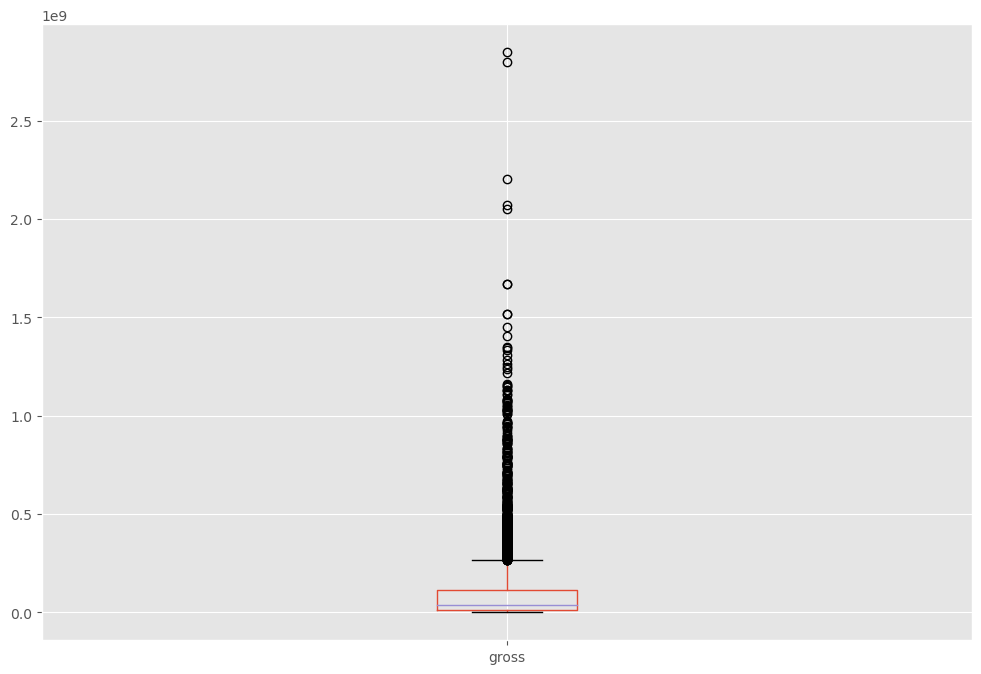

In [190]:
# Check outliers
df.boxplot(column=['gross'])

In [161]:
#change data type for columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [165]:
# creat correct year column
#df['yearcorrect'] = df['released'].astype(str).str[:4]  used for data old version

df['drop_country'] = df['released'].str.replace(r"\(.*\)", "")
df['yearcorrect'] = df['drop_country'].astype(str).str[-5:]

C:\Users\songsh\AppData\Local\Temp\ipykernel_4520\3412054824.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['drop_country'] = df['released'].str.replace(r"\(.*\)", "")


In [167]:
#sort data
df = df.sort_values(by = ['gross'], inplace=False, ascending = False)

In [168]:
# this will display all data
pd.set_option('display.max_rows', None)

In [8]:
#drop duplicates
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [141]:
#find correlation
#budget high correlation
#company high correlation

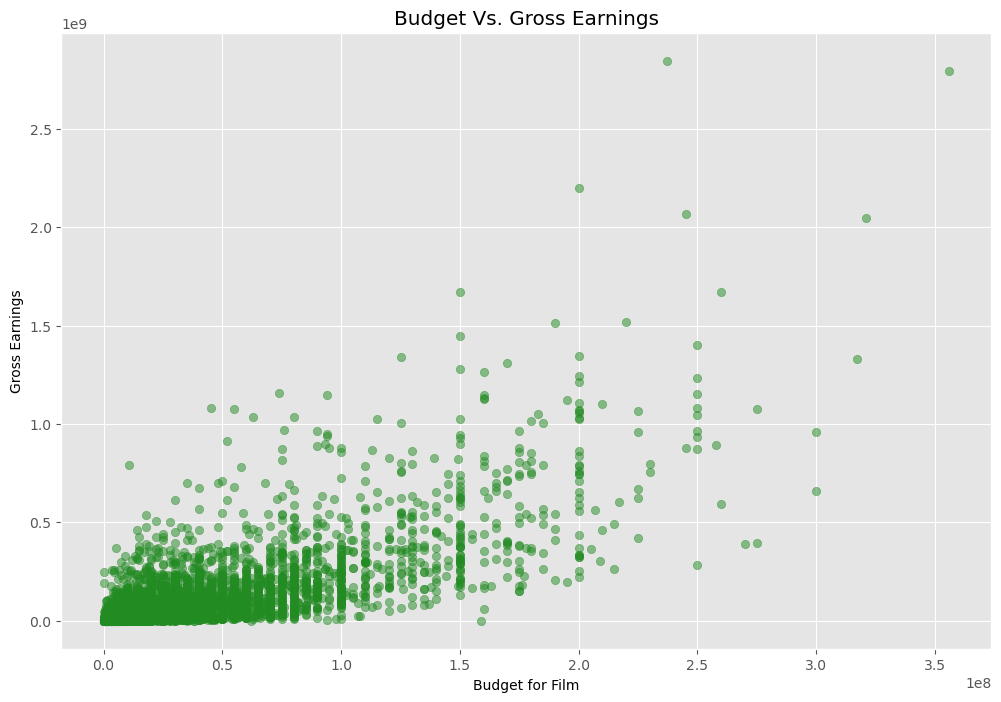

In [233]:
#build scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'], color = 'forestgreen', alpha = 0.5)
plt.title('Budget Vs. Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

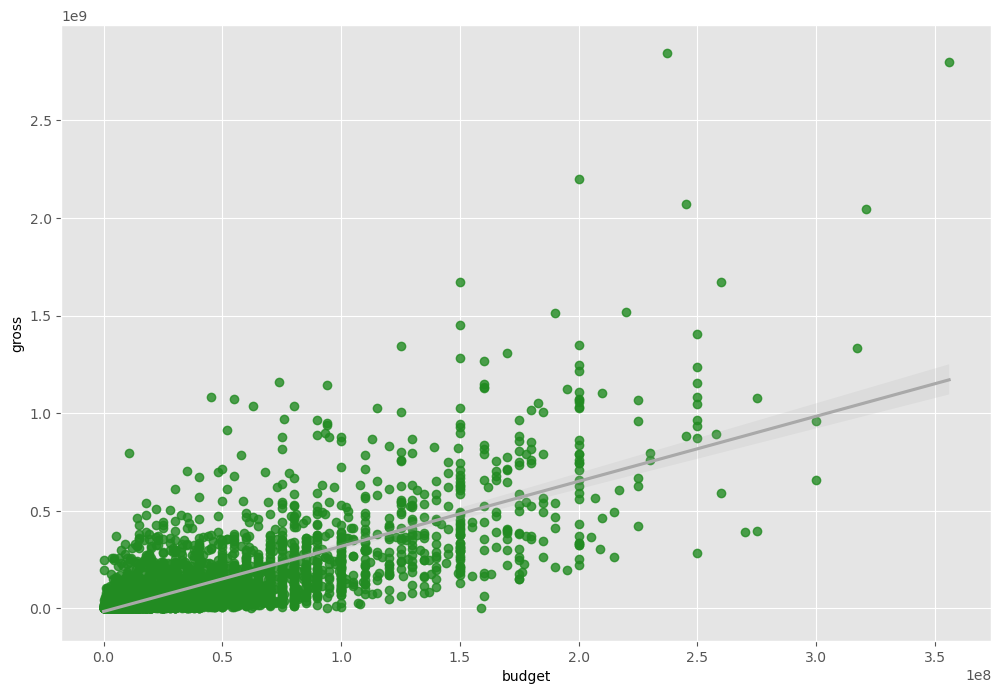

In [193]:
# Plot the budget vs. gross regression using seaborn
sns.regplot(x = "budget", y = "gross", data = df, scatter_kws = {"color":"forestgreen"}, line_kws = {"color":"darkgrey"})

In [172]:
#determine correlation - different methods
#only works for numerical fields
df.corr() # default is pearson. Other types: kendall, spearman. they have slightlt different ways of determine the correlation

C:\Users\songsh\AppData\Local\Temp\ipykernel_4520\865025846.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # default is pearson. Other types: kendall, spearman. they have slightlt different way of determine the correlation


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [173]:
df.corr(method = "kendall")

C:\Users\songsh\AppData\Local\Temp\ipykernel_4520\3593226891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = "kendall")


,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [174]:
df.corr(method = "spearman")

C:\Users\songsh\AppData\Local\Temp\ipykernel_4520\636568451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = "spearman")


,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


C:\Users\songsh\AppData\Local\Temp\ipykernel_4520\1956418597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_metrix = df.corr(method = "pearson")


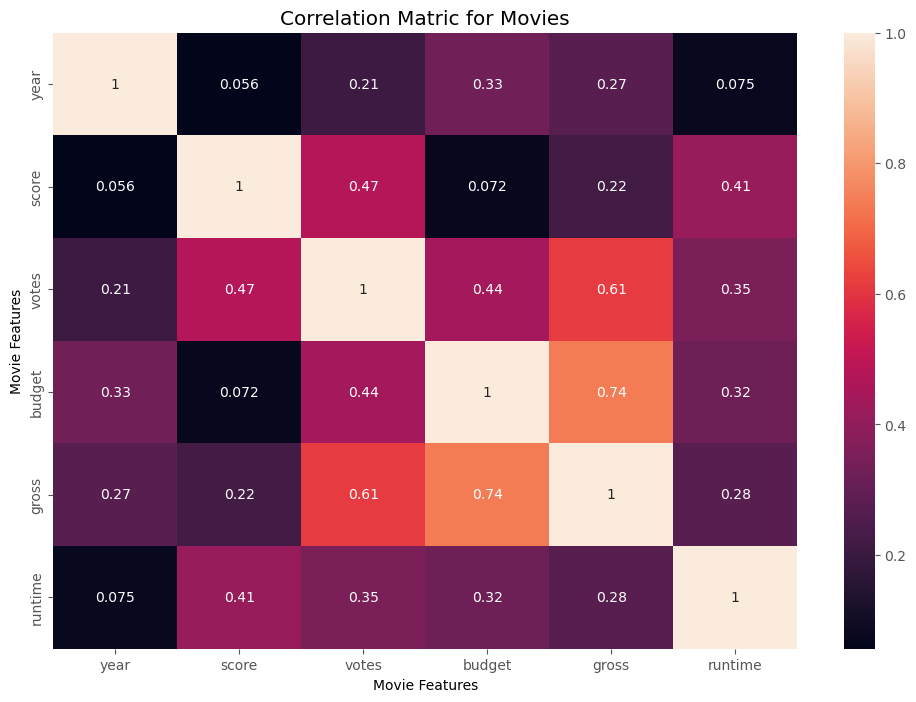

In [175]:
#Visualize correlation - high correlation between budget and gross
correlation_metrix = df.corr(method = "pearson")
sns.heatmap(correlation_metrix, annot = True)  #annot = annotation
plt.title("Correlation Matric for Movies")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [230]:
#look at company - create numerical reps for companies
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,drop_country,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,496,29
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,124,39
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,502,17
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,498,35
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,132,38


In [229]:
#Using factorize - assign a random numeric value for each unique categorical value
df.apply(lambda x:x.factorize()[0]).corr(method = 'pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,drop_country,yearcorrect
name,1.000000,0.314800,0.186668,0.267282,0.667785,0.136453,0.608411,0.679808,0.764057,0.599410,0.124405,0.526690,0.986431,0.631721,0.089567,0.603778,0.262849
rating,0.314800,1.000000,0.031419,0.096638,0.241253,-0.075109,0.121122,0.230190,0.251470,0.226007,0.111309,0.283770,0.319778,0.269792,0.029208,0.200941,0.087261
genre,0.186668,0.031419,1.000000,0.075279,0.115079,0.047421,0.177836,0.131437,0.129595,0.143735,-0.055109,0.175071,0.185075,0.080643,0.011329,0.117807,0.071750
year,0.267282,0.096638,0.075279,1.000000,0.359792,0.045163,0.286895,0.186504,0.231664,0.240670,-0.047325,0.190333,0.277721,0.136096,0.037011,0.409038,0.949995
released,0.667785,0.241253,0.115079,0.359792,1.000000,0.099608,0.481682,0.478950,0.541155,0.439566,0.095519,0.396934,0.677897,0.410407,0.058183,0.922022,0.358544
score,0.136453,-0.075109,0.047421,0.045163,0.099608,1.000000,0.247863,0.176116,0.122357,0.139126,-0.057087,-0.005767,0.139819,0.022732,0.057866,0.120686,0.053108
votes,0.608411,0.121122,0.177836,0.286895,0.481682,0.247863,1.000000,0.472671,0.522918,0.429085,0.013363,0.317842,0.620450,0.346864,0.088525,0.479196,0.287857
director,0.679808,0.230190,0.131437,0.186504,0.478950,0.176116,0.472671,1.000000,0.642875,0.504992,0.123672,0.443150,0.692902,0.528071,0.084943,0.429317,0.190556
writer,0.764057,0.251470,0.129595,0.231664,0.541155,0.122357,0.522918,0.642875,1.000000,0.510628,0.138299,0.449523,0.776528,0.532013,0.066645,0.489804,0.230543
star,0.599410,0.226007,0.143735,0.240670,0.439566,0.139126,0.429085,0.504992,0.510628,1.000000,0.106459,0.457442,0.612142,0.455443,0.096652,0.407462,0.242124


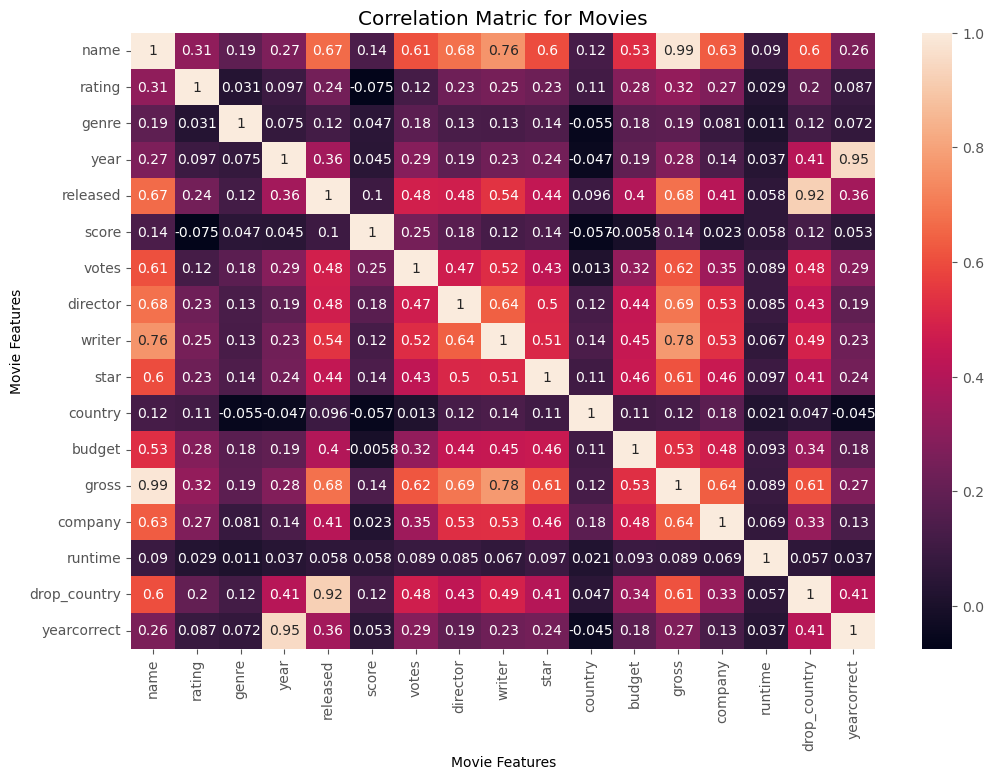

In [197]:
correlation_metrix = df.apply(lambda x:x.factorize()[0]).corr(method = 'pearson')  # Correaltion inlcudes all fields after factorization. 
sns.heatmap(correlation_metrix, annot = True)  #annot = annotation
plt.title("Correlation Matric for Movies")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [209]:
#how to view correaltion quickly
correlation_mat = df.apply(lambda x:x.factorize()[0]).corr(method = 'pearson')
corr_pairs = correlation_mat.unstack()
corr_pairs
sorted_pairs = corr_pairs.sort_values(kind = "quicksort")
sorted_pairs

rating        score          -0.075109
score         rating         -0.075109
              country        -0.057087
country       score          -0.057087
genre         country        -0.055109
country       genre          -0.055109
              year           -0.047325
year          country        -0.047325
country       yearcorrect    -0.045134
yearcorrect   country        -0.045134
budget        score          -0.005767
score         budget         -0.005767
genre         runtime         0.011329
runtime       genre           0.011329
votes         country         0.013363
country       votes           0.013363
              runtime         0.020546
runtime       country         0.020546
company       score           0.022732
score         company         0.022732
rating        runtime         0.029208
runtime       rating          0.029208
genre         rating          0.031419
rating        genre           0.031419
yearcorrect   runtime         0.036785
runtime       yearcorrect

In [215]:
#Check high correlation variables
high_corr = sorted_pairs[abs(sorted_pairs)>0.5]
high_corr

star          director        0.504992
director      star            0.504992
writer        star            0.510628
star          writer          0.510628
writer        votes           0.522918
votes         writer          0.522918
budget        name            0.526690
name          budget          0.526690
director      company         0.528071
company       director        0.528071
writer        company         0.532013
company       writer          0.532013
budget        gross           0.532810
gross         budget          0.532810
released      writer          0.541155
writer        released        0.541155
name          star            0.599410
star          name            0.599410
drop_country  name            0.603778
name          drop_country    0.603778
votes         name            0.608411
name          votes           0.608411
gross         star            0.612142
star          gross           0.612142
drop_country  gross           0.612468
gross         drop_countr

In [217]:
#Top 15 companies by gross revenue
CompanyGrossSum = df.groupby('company')[['gross']].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')
CompanyGrossSumSorted

company
1426    54610959970
1397    51241105418
452     42356430218
1108    40021704691
1382    39542573303
1423    35833650748
1044    19612851164
983     15065592411
550     11873612858
551     11593807697
1367    10664679494
1001     8937010092
1309     8318570396
1134     7886344526
682      7243673721
Name: gross, dtype: int64

In [228]:
#group by company, year. Sort by gross.
df.groupby(['company', 'yearcorrect'])[['gross']].sum().sort_values('gross', ascending = False)[:15]

,,gross
company,yearcorrect,
1423,39,5773131804
983,38,4018631866
1397,35,3834354888
1382,29,3793491246
1423,37,3789382071
1108,31,3565705182
1426,31,3168551343
1423,30,3104474158
1108,34,3071298586
